### Hypothesis Testing Using Python

A machine is producing perfume bottles with the long term average of 150cc and the standard deviation of 2 cc.
Four bottles were picked and the average volume was found to be 153.8cc.
Has the average volume changed from 150cc? Test with 95% confidence level.

Null Hypothesis: Mean volume = 150cc

Alpha = 1 - 0.95 = 0.05

Z calculated = (Observed mean - population mean) / standard error z = (x — μ) / (σ / √n)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:

Z_cal = (153.8 - 150) / (2/np.sqrt(4))
# import math
# Z_cal = (153.8 - 150) / (2/math.sqrt(4))
Z_cal


3.8000000000000114

In [3]:
# norm.pdf(x, loc=0, scale=1) Probability density function.

# norm.cdf(x, loc=0, scale=1)  Cumulative distribution function. (area to the left of x)

# norm.sf(x, loc=0, scale=1) Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

# norm.ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).

# norm.isf(q, loc=0, scale=1) Inverse survival function (inverse of sf).

In [7]:
norm.cdf(1.96) #take the Z critical value and give area on the left

0.9750021048517795

In [72]:
norm.cdf(0.4)

0.6554217416103242

In [8]:
norm.cdf(-1.96) # #take the Z critical value and give area on the left

0.024997895148220435

In [9]:
norm.ppf(0.02499) # this will take area left and give Z critical value

-1.9601351140675658

In [10]:
# what is thea on the right of Z value 1.96
norm.sf(1.96) #take the Z critical value and give area on the right

0.024997895148220435

In [11]:
norm.isf(0.0249) # this will take area on the right and give Z critical value . This is inverse of sf

1.9616778690637864

In [12]:
# Z critical Value on the left given area
Z_crit_left = norm.ppf(0.025)
Z_crit_left


-1.9599639845400545

In [13]:
# Z critical Value on the right given area
Z_crit_right = norm.isf(0.025)
Z_crit_right

1.9599639845400545

In [14]:
#Conclusion: Reject the Null Hypothesis
# Thinking in terms of p-value
pvalue = 2 * norm.sf(Z_cal) # area to the right of Z_cal (on two tails)
pvalue
0.0001446960878502333

0.0001446960878502333

# Question: I want 10% area on the right. What is the Z critical value?


In [22]:
norm.isf(.10) # TAkes area on the right and gives the Z value

1.2815515655446004

In [24]:
norm.ppf(.90) # # TAkes area on the left and gives the Z value

1.2815515655446004

In [15]:

from statsmodels.stats import weightstats  #Z test
import scipy.stats as stats # t-test (It does not have z test option) ******** Remember it

# One Sample Ztest

In [16]:
df=pd.read_csv('Machine1.csv')
df # elizable for z test

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58
...,...
95,150.03
96,146.79
97,150.02
98,146.42


In [17]:
df.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


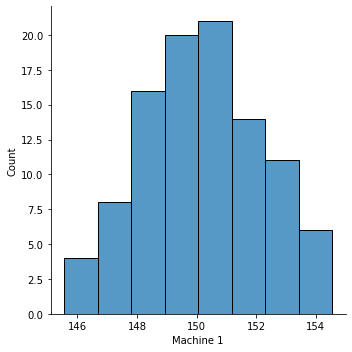

In [18]:
sns.displot(data=df,x='Machine 1')#df['machine']


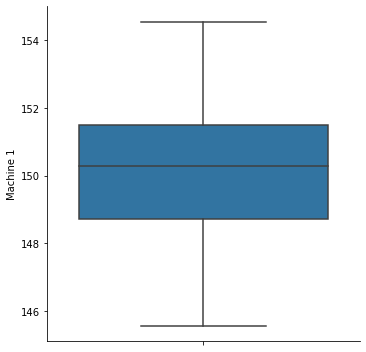

In [19]:
sns.catplot(data=df,y='Machine 1',kind='box')

In [20]:
z_cal, p_val=weightstats.ztest(df['Machine 1'], value=150,alternative='two-sided' )

# weightstats.ztest(df['Machine 1'], value=150,alternative='large' ) # upper tail test
print("Z cal: ", z_cal)
print("P value: ", p_val)

Z cal:  1.0060370247722599
P value:  0.3143977600779597


In [21]:
# p value > 0.05 we dont have enough evidence to reject Ho. SO we are accepting null hypothesis.

# One Sample T test

Number of sample <=30


In [26]:
volume=pd.Series([148.3,153,150,151.2])

In [28]:
volume.describe()

count      4.00000
mean     150.62500
std        1.98053
min      148.30000
25%      149.57500
50%      150.60000
75%      151.65000
max      153.00000
dtype: float64

In [31]:
import scipy.stats as stats
_,p_val=stats.ttest_1samp(volume,150) 
p_val
# Pvalue > alpha, we don't have enough evidence to reject the null hypothesis.
# Here we do not specify the significance level we check p value for different confidence interval

0.5727542889376731

# 3.One Proportion Test

** Here we not have to make any normal approximation as we can directly use the binomial distribution available in the scipy library

# Whether te smoking habbit has changed or not


Ho: P=Po

Ha: P!=Po

Two tailed test with 95% CI and alpha =5%

In [73]:
stats.binom_test(14,100,p=0.21, alternative='two-sided')

#14 --> the number of smokers in the sample you've taken
#100--> the number of samples you're tackling
# p--> the previous proportion of the smokers in the population
# Conclusion: We cannot reject the null Hypothesis

0.1092081572082592

# Has the smoking habit reduced?

In [74]:
stats.binom_test(14,100,p=0.21, alternative='less')

#Rejecting the Null hypothesis

0.0504246022155211

# Smoker's Dataset

In [75]:
df_smk=pd.read_csv('Smokers.csv')
df_smk

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No
...,...,...
95,Person 96,No
96,Person 97,No
97,Person 98,No
98,Person 99,No


In [76]:
smk=df_smk.groupby(by='Smokers').count()
smk

,Name
Smokers,
No,86
Yes,14


In [77]:
# smk.iloc[::-1]

,Name
Smokers,
Yes,14
No,86


In [78]:
smk=smk.reindex(['Yes','No'])

In [79]:
smk

,Name
Smokers,
Yes,14
No,86


In [80]:
stats.binom_test(smk,p=0.21)

array([0.10920816])

# 4. One Variance test (Chi Square)

*** We dont have direct function for this. So, we will have to use python as a calculator

In [81]:
Chi_sq_cal = (51-1)*(2.35**2)/ (2**2)
Chi_sq_cal

69.03125000000001

In [82]:
# Chi Square Critical
# 10% area on the right for df=50 at chi-sqr
stats.chi2.isf(0.10, 50)

#### Conclusion: Reject the Null Hypothesis

63.167121005726315